In [3]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from qaoa_and_tdvp import QAOAResult
import math
from scipy.interpolate import griddata
import numpy as np
from qaoa_and_tdvp import QAOA
from benchmark import load_instances
import networkx as nx

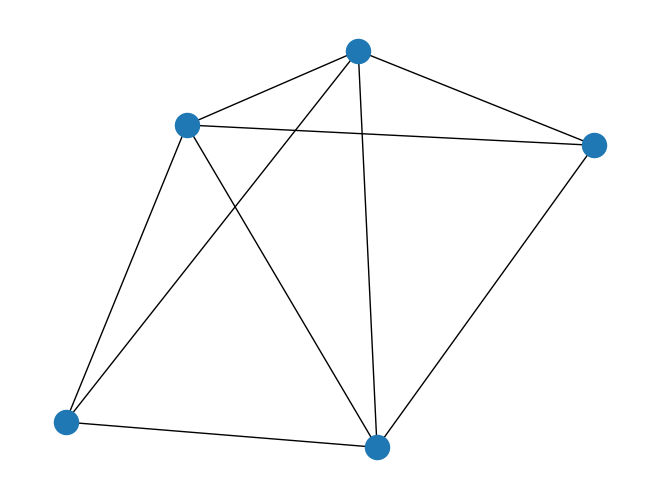

In [3]:
nx.draw(load_instances(5,p_max=1).loc[1,5]['instance'].graph)

In [4]:
n=4

In [11]:
with open(f'.//results//data_gd_cut.p', 'rb') as file:
    data = pickle.load(file)
data.head(10)

instance  \
n p i                                             
3 1 0  <MaxCut.MaxCut object at 0x7f3f1169a650>   
    1  <MaxCut.MaxCut object at 0x7f3f10a82dd0>   
  2 0  <MaxCut.MaxCut object at 0x7f3f1169a650>   
    1  <MaxCut.MaxCut object at 0x7f3f10a82dd0>   
4 1 0  <MaxCut.MaxCut object at 0x7f3f10a80070>   
    1  <MaxCut.MaxCut object at 0x7f3f10a82ad0>   
    2  <MaxCut.MaxCut object at 0x7f3f10c42710>   
    3  <MaxCut.MaxCut object at 0x7f3f10c422c0>   
    4  <MaxCut.MaxCut object at 0x7f3f10c42f80>   
    5  <MaxCut.MaxCut object at 0x7f3f10c43880>   

                                                    tdvp  \
n p i                                                      
3 1 0  instance                                    <M...   
    1  instance                                    <M...   
  2 0  instance                                    <M...   
    1  instance                                    <M...   
4 1 0  instance                                    <M...   
    1  instance                                    <M...   
    2  instance                                    <M...   
    3  instance                                    <M...   
    4  instance                                    <M...   
    5  instance                                    <M...   

                                                   scipy  \
n p i                                                      
3 1 0  instance                                    <M...   
    1  instance                                    <M...   
  2 0  instance                                    <M...   
    1  instance                                    <M...   
4 1 0  instance                                    <M...   
    1  instance                                    <M...   
    2  instance                                    <M...   
    3  instance                                    <M...   
    4  instance                                    <M...   
    5  instance                                    <M...   

                                        gradient_descent  
n p i                                                     
3 1 0  algorithm                                     ...  
    1  algorithm                                     ...  
  2 0  algorithm                                     ...  
    1  algorithm                                     ...  
4 1 0  algorithm                                     ...  
    1  algorithm                                     ...  
    2  algorithm                                     ...  
    3  algorithm                                     ...  
    4  algorithm                                     ...  
    5  algorithm                                     ...

In [6]:
data

instance  \
n p i                                             
3 1 0  <MaxCut.MaxCut object at 0x7fc3398f7ee0>   
    1  <MaxCut.MaxCut object at 0x7fc2cbaeff40>   
  2 0  <MaxCut.MaxCut object at 0x7fc3398f7ee0>   
    1  <MaxCut.MaxCut object at 0x7fc2cbaeff40>   
4 1 0  <MaxCut.MaxCut object at 0x7fc2cbaef7f0>   
...                                         ...   
5 4 5  <MaxCut.MaxCut object at 0x7fc2cbba6e60>   
    6  <MaxCut.MaxCut object at 0x7fc2cbba7160>   
    7  <MaxCut.MaxCut object at 0x7fc2cbba7460>   
    8  <MaxCut.MaxCut object at 0x7fc2cbba7760>   
    9  <MaxCut.MaxCut object at 0x7fc2cbba7a60>   

                                                    tdvp  \
n p i                                                      
3 1 0  instance                                    <M...   
    1  instance                                    <M...   
  2 0  instance                                    <M...   
    1  instance                                    <M...   
4 1 0  instance                                    <M...   
...                                                  ...   
5 4 5  instance                                    <M...   
    6  instance                                    <M...   
    7  instance                                    <M...   
    8  instance                                    <M...   
    9  instance                                    <M...   

                                                   scipy  \
n p i                                                      
3 1 0  instance                                    <M...   
    1  instance                                    <M...   
  2 0  instance                                    <M...   
    1  instance                                    <M...   
4 1 0  instance                                    <M...   
...                                                  ...   
5 4 5  instance                                    <M...   
    6  instance                                    <M...   
    7  instance                                    <M...   
    8  instance                                    <M...   
    9  instance                                    <M...   

                                        gradient_descent  
n p i                                                     
3 1 0  algorithm                                     ...  
    1  algorithm                                     ...  
  2 0  algorithm                                     ...  
    1  algorithm                                     ...  
4 1 0  algorithm                                     ...  
...                                                  ...  
5 4 5  algorithm                                     ...  
    6  algorithm                                     ...  
    7  algorithm                                     ...  
    8  algorithm                                     ...  
    9  algorithm                                     ...  

[74 rows x 4 columns]

In [9]:
with open(f'.//results//stats_gd_cut.p', 'rb') as file:
    stats = pickle.load(file)
stats.head(10)

expectation approximation ratio                      \
                                                mean       std       min   
n Algorithm        p                                                       
3 tdvp             1                        0.911088  0.073714  0.858965   
                   2                        0.930390  0.063845  0.885245   
  scipy            1                        0.778976  0.112656  0.699316   
                   2                        0.930466  0.058679  0.888974   
  gradient_descent 1                        0.306478  0.432672  0.000533   
                   2                        0.652124  0.047679  0.618410   
4 tdvp             1                        0.555697  0.320149  0.133846   
                   2                        0.914538  0.023949  0.873142   
                   3                        0.926812  0.027653  0.895857   
                   4                        0.943432  0.049538  0.869999   

                               groundspace overlap                      \
                           max                mean       std       min   
n Algorithm        p                                                     
3 tdvp             1  0.963212            0.869012  0.145009  0.766475   
                   2  0.975536            0.931829  0.071453  0.881304   
  scipy            1  0.858635            0.766332  0.006235  0.761923   
                   2  0.971958            0.893380  0.117401  0.810365   
  gradient_descent 1  0.612424            0.358776  0.307027  0.141675   
                   2  0.685838            0.636691  0.049783  0.601489   
4 tdvp             1  0.963225            0.464344  0.373130  0.019871   
                   2  0.947408            0.895209  0.049664  0.831052   
                   3  0.966206            0.866436  0.068250  0.795922   
                   4  0.974706            0.930693  0.062414  0.843536   

                               groundspace sharpness            ...  \
                           max                  mean       std  ...   
n Algorithm        p                                            ...   
3 tdvp             1  0.971549              0.294665  0.181596  ...   
                   2  0.982354              0.227546  0.135601  ...   
  scipy            1  0.770741              0.423131  0.003925  ...   
                   2  0.976395              0.271914  0.169845  ...   
  gradient_descent 1  0.575877              0.421463  0.102879  ...   
                   2  0.671892              0.479558  0.014190  ...   
4 tdvp             1  0.962394              0.331865  0.164583  ...   
                   2  0.943499              0.297600  0.061860  ...   
                   3  0.967577              0.324697  0.090627  ...   
                   4  0.977556              0.232359  0.100608  ...   

                           steps                             path length  \
                            mean          std    min     max        mean   
n Algorithm        p                                                       
3 tdvp             1   82.000000     7.071068   77.0    87.0    0.912754   
                   2  124.000000    32.526912  101.0   147.0    0.823661   
  scipy            1   23.500000     0.707107   23.0    24.0    0.131371   
                   2   49.000000     1.414214   48.0    50.0    0.081390   
  gradient_descent 1   59.000000     0.000000   59.0    59.0    0.230496   
                   2   95.000000     0.000000   95.0    95.0    0.088509   
4 tdvp             1   75.666667     7.312090   62.0    82.0    0.837968   
                   2  235.000000   232.458168   79.0   701.0    0.782392   
                   3  774.600000  1247.291987   85.0  3000.0    0.593010   
                   4  157.000000    45.731098  126.0   225.0    0.675338   

                                                    \
                           std       min       max   
n Algorithm        p                            

In [8]:
stats['gate count']

mean           std           min           max
n Algorithm        p                                                        
3 tdvp             1  5.176140e+05  1.236645e+05  4.301700e+05  6.050580e+05
                   2  5.617348e+06  2.211776e+06  4.053386e+06  7.181310e+06
  scipy            1  1.326000e+03  2.460732e+02  1.152000e+03  1.500000e+03
                   2  3.006000e+03  5.091169e+02  2.646000e+03  3.366000e+03
  gradient_descent 1  3.828600e+04  6.016064e+03  3.403200e+04  4.254000e+04
                   2  6.846000e+04  9.681706e+03  6.161400e+04  7.530600e+04
4 tdvp             1  1.583379e+06  3.224802e+05  1.069340e+06  1.938870e+06
                   2  3.716655e+07  4.387496e+07  1.101945e+07  1.254455e+08
                   3  3.475263e+08  5.311317e+08  3.665482e+07  1.293696e+09
                   4  2.010430e+08  6.750225e+07  1.450715e+08  2.956321e+08
                   5  2.341077e+09  2.048317e+09  5.209588e+08  4.559181e+09
  scipy            1  2.524000e+03  7.076406e+02  1.848000e+03  3.808000e+03
                   2  8.480000e+03  3.476959e+03  4.608000e+03  1.310400e+04
                   3  1.148800e+04  5.304971e+03  5.824000e+03  1.851200e+04
                   4  1.327467e+04  2.451222e+03  1.108800e+04  1.779200e+04
                   5  2.085733e+04  9.766552e+03  1.394400e+04  4.032000e+04
  gradient_descent 1  9.397333e+04  1.647886e+04  7.752800e+04  1.198160e+05
                   2  3.560400e+05  5.807817e+04  2.980800e+05  4.471200e+05
                   3  1.075664e+06  1.640217e+05  9.119760e+05  1.332888e+06
                   4  1.736560e+05  2.485858e+04  1.488480e+05  2.126400e+05
                   5  8.210453e+05  1.107507e+05  7.105200e+05  9.947280e+05
5 tdvp             1  4.528892e+06  2.212949e+06  1.927116e+06  9.187774e+06
                   2  9.812109e+07  8.393361e+07  2.571142e+07  3.004969e+08
                   3  2.558601e+08  1.165006e+08  1.055768e+08  4.383336e+08
                   4  2.029902e+09  3.040493e+09  4.474770e+08  8.175679e+09
  scipy            1  5.040000e+03  1.654059e+03  3.080000e+03  7.280000e+03
                   2  1.154300e+04  4.037764e+03  7.770000e+03  2.235000e+04
                   3  1.613600e+04  3.480968e+03  1.120000e+04  2.160000e+04
                   4  2.429300e+04  7.896814e+03  1.615000e+04  4.242000e+04
  gradient_descent 1  2.113920e+05  4.178001e+04  1.541400e+05  2.862600e+05
                   2  7.435620e+05  1.396841e+05  5.521500e+05  9.938700e+05
                   3  4.666120e+05  8.352208e+04  3.521600e+05  6.162800e+05
                   4  1.394382e+06  2.383472e+05  1.067770e+06  1.821490e+06

In [9]:
stats['expectation approximation ratio per circuits'].reset_index()

,n,Algorithm,p,mean,std
0,3,tdvp,1,3.085298e-04,-1.633817e-06
1,3,tdvp,2,6.946841e-05,-1.345410e-05
2,3,scipy,1,3.179493e-02,3.680538e-03
3,3,scipy,2,1.860931e-02,6.472214e-04
4,3,gradient_descent,1,1.293157e-03,1.825622e-03
5,3,gradient_descent,2,8.569305e-04,6.265318e-05
6,4,tdvp,1,6.799184e-05,3.260188e-05
7,4,tdvp,2,1.201111e-05,-1.156650e-05
8,4,tdvp,3,1.846452e-06,-2.918133e-06
9,4,tdvp,4,5.563967e-06,-1.328516e-06


In [13]:
def algo_num(algo:str)->int:
    assert algo in {'tdvp','scipy','gradient_descent'}
    if algo=='tdvp':
        return 1
    elif algo=='scipy':
        return 0
    elif algo=='gradient_descent':
        return -1

In [4]:
BA_template = dict(
    layout=go.Layout(
    template='plotly_white',
    yaxis=dict(
        linewidth = 1,
        linecolor = 'black',
        gridcolor = 'lightgrey',
        zerolinecolor = 'black',

    ),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1,        
        range=[-.5,5],
        autorange=True,
        # type='category',
        linewidth = 1,
        linecolor = 'black',
        gridcolor = 'lightgrey',
        # zerolinecolor = 'black',

    ),
    font=dict(
        family='Computer Modern',
        size=12,
    ),
    
        
    
    # paper_bgcolor='rgba(0,0,0,0)',   # transparent background
    plot_bgcolor='rgba(0,0,0,0)',)
)

In [5]:

yaxis_names = {
    "expectation approximation ratio": "Expectation of the approximation ratio",
    "groundspace overlap": "Groundspace overlap",
    "groundspace sharpness": "Groundspace sharpness",
    "approximation ratio": "Approximation ratio",
    "circuit count": "Number of circuits",
    "gate count": "Number of gates",
    "num_fun_calls": "Number of function calls",
    "steps": "Number of steps",
    "path length": "Path length",
    'expectation approximation ratio per circuits': 'Expectation of the approximation ratio per circuit',
    
}

layout = {
    "expectation approximation ratio": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[-1., 1.02],
                    tickmode="linear",
                    tick0=0,
                    dtick=0.2,
                    autorange=False,
                ),
            ),
    "groundspace overlap": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[0, 1.02],
                    tickmode="linear",
                    tick0=0,
                    dtick=0.2,
                    autorange=False,
                ),
            ),
    "groundspace sharpness": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[0, 1.02],
                    tickmode="linear",
                    tick0=0,
                    dtick=0.2,
                    autorange=False,
                ),
            ),
    "approximation ratio": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[-1., 1.02],
                    tickmode="linear",
                    tick0=0,
                    dtick=0.2,
                    autorange=False,
                ),
            ),
    "circuit count": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    type='log',
                    autorange=False,
                    range=[-1,7],
                ),
            ),
    "gate count": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    type='log',
                    autorange=False,
                    range=[-1,10],
                    
                ),
            ),
    "num_fun_calls": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[0, 1.02],
                    tickmode="linear",
                    tick0=0,
                    dtick=0.2,
                    autorange=False,
                ),
            ),
    "steps": dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[0, 1.02],
                    tickmode="linear",
                    tick0=0,
                    dtick=0.2,
                    autorange=False,
                ),
            ),
    'path length': dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[0, 1.02],
                    # tickmode="linear",
                    # tick0=0,
                    # dtick=0.2,
                    # type='log',
                    autorange=False,
                ),
            ),
    'expectation approximation ratio per circuits': dict(
                template=BA_template,
                xaxis_title="p",
                legend_title_text="Algorithm",
                width=700,
                yaxis=dict(
                    range=[-8, -1],
                    # tickmode="linear",
                    # tick0=0,
                    # dtick=0.2,
                    # type='log',
                    # autorange=True,
                    type='log',
                ),
    ),
}


In [6]:
def plot_results(meas:str,n:int) -> go.Figure:
    df = stats[meas].xs(n, level="n").reset_index()
    # flattend_data
    data_red = pd.concat(
        [
            data["tdvp"].xs(n, level="n").apply(lambda x: x),
            data["scipy"].xs(n, level="n").apply(lambda x: x),
            data["gradient_descent"].xs(n, level="n").apply(lambda x: x),
        ]
    ).reset_index(drop=True)
    data_red

    gridcolor = "lightgrey"

    if meas == "path length":
        df.drop(df[df["Algorithm"] == "scipy"].index, inplace=True)
    
    scatter = px.scatter(
        data_frame=df,
        x=df["p"] + 0.1 * df["Algorithm"].apply(algo_num),  # for the offset
        y="mean",
        error_y="std",
        color="Algorithm",
        symbol="Algorithm",
        # barmode='group',
    )

    # box = px.box(
    #     data_frame=data_red,
    #     x="p",
    #     y=meas,
    #     color="algorithm",
    #     # points='all',
    # )
    # box.update_traces(
    #     quartilemethod="inclusive"
    # )  # or "inclusive", or "linear" by default

    fig = scatter

    # rename traces
    newnames = {"tdvp": "TDVP", "scipy": "COBYLA", "gradient_descent": "GD"}
    fig.for_each_trace(
        lambda t: t.update(
            name=newnames.get(t.name, ""),
            legendgroup=newnames.get(t.name, ""),
            hovertemplate=t.hovertemplate.replace(t.name, newnames[t.name]),
        )
    )

    fig.update_layout(
        layout[meas],
        template = BA_template,
        yaxis_title=yaxis_names[meas],
        
    )
    return fig



In [14]:
for meas in stats.loc[4,'tdvp',1].index.levels[0][:-1]:
    for n in {4,5}:
        fig = plot_results(meas, n)
        fig.write_image(f'plots//{meas.replace(" ", "_")}_n_{n}_scatter.pdf')

In [13]:
# for meas in stats.columns.levels[0]:
#     for n in [3, 4, 5]:
        
#         fig.write_image(f".//plots//{meas}_n{n}_scatter.svg")


In [14]:
with open("./results/grid_search_n5_p2_i5.p",'rb') as file:
    grid_search = pickle.load(file)

In [15]:
with open("results/data.p",'rb') as file:
    data = pickle.load(file)

In [16]:
idx = (5,1,5)
qaoa = QAOA(data.loc[idx]['instance'],p=idx[1])

In [17]:
hover = 1

In [18]:
def get_sizes(zlist):
    size_step = round(len(zlist)/10)
    sizes = [11,]
    for i in range(10*size_step):
        if i%size_step == 0:
            sizes.append(sizes[-1]-1)
        else:
            sizes.append(sizes[-1])
            
    over = len(sizes)-len(zlist)
    for _ in range(over):
        sizes.pop()
    under = len(zlist)-len(sizes)
    for _ in range(under):
        sizes.append(sizes[-1])
    return sizes

In [19]:
init_path = [(1,1)]
init_x = np.array([1,])
init_y = np.array([1,])
init_z = np.array([qaoa.expectation((1,1)),])

In [20]:
tdvp_path = data.loc[idx]['tdvp']['path']
tdvp_x = np.array([d[0] for d in tdvp_path])
tdvp_y = np.array([d[1] for d in tdvp_path])
tdvp_z = np.array([qaoa.expectation(d) for d in tdvp_path])

In [21]:
data.loc[idx]['gradient_descent']['path'].insert(0,(1,1))


In [22]:
gd_path = data.loc[idx]['gradient_descent']['path']
gd_path.insert(0,(1,1))
gd_x = np.array([d[0] for d in gd_path])
gd_y = np.array([d[1] for d in gd_path])
gd_z = np.array([qaoa.expectation(d) for d in gd_path])

In [90]:
df = grid_search

x = np.array(df.beta)
y = np.array(df.gamma)
z = np.array(df.value)


xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)

X, Y = np.meshgrid(xi, yi)

Zlandscape = griddata((x, y), z, (X, Y), method="cubic")


Zpath_tdvp = griddata((tdvp_x, tdvp_y), tdvp_z, (xi, yi))

fig = go.Figure(
        go.Surface(
            x=xi, 
            y=yi, 
            z=Zlandscape,
            opacity = 1,
            ),
        )

fig.add_scatter3d(
    x=tdvp_x,
    y=tdvp_y,
    z=tdvp_z+hover,
    name='TDVP',
    marker = dict(
        size=get_sizes(tdvp_z),
        sizemin = 5,
        symbol='diamond', # ( "circle" | "circle-open" | "cross" | "diamond" | "diamond-open" | "square" | "square-open" | "x" ) 
    ),
)
fig.add_scatter3d(
    x=gd_x,
    y=gd_y,
    z=gd_z+hover,
    name='GD',
    line = dict(
        width=4
    ),
    marker=dict(
        size=get_sizes(gd_z),
        sizemin = 5,
        # color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        # opacity=0.8,
        symbol='circle', # ( "circle" | "circle-open" | "cross" | "diamond" | "diamond-open" | "square" | "square-open" | "x" ) 
        
    )
)
fig.add_scatter3d(
    x=init_x,
    y=init_y,
    z=init_z+hover,
    name='Initial point = (1,1)',
    line = dict(
        width=4
    ),
    marker=dict(
        size=5,
        color= 'red',
        symbol='x',
        opacity = .7,
    )
)

# fig.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))

fig.update_traces(showscale=False, selector=dict(type='surface'))

fig.update_layout(
    template=BA_template, 
    width=1000, 
    height=1000,
    legend = dict(
        yanchor="top",
        xanchor="left",
        y = 0.9,
        x = 0.1,
    ),
    scene = dict(
        xaxis_title=u'\u03B2',
        yaxis_title=u'\u03B3',
        zaxis_title=u'\u27E8H\u27E9',
        xaxis= {"nticks": 20},
        zaxis ={"nticks": 10},
        camera_eye ={"x": -1.4, "y": 1, "z": 1},
        aspectratio ={"x": 1, "y": 1, "z": 0.6}
        )
    )
# fig.show()
fig.write_image('./plots/grid_seach_n5_p1_i5.pdf')
